# *Algerian Forest Fires

## DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index

Import the dataset. https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

## 2. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**

**2. Data Cleaning for EDA Report** 

**3. Exploratory Data Analysis (EDA) on all Features**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## Load the data

In [141]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")

In [142]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


##  Data Cleaning

In [143]:
df.shape

(244, 15)

In [144]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [145]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

####  Some column names were misspaced so we can fix it

In [146]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

####  Looks like the values were misspaced so we can use **str.strip()** method

In [147]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

**Changing the required columns as integer data type**

In [148]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [149]:
df[['day','month','year','Temperature','RH','Ws','Region']] =df[['day','month','year','Temperature','RH','Ws','Region']].astype(int) 

In [150]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

**Changing the other columns to Float data type**

In [151]:
object = [feature for feature in df.columns if df[feature].dtypes == 'O']


In [152]:
object

['Classes']

In [153]:
for i in object:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [154]:
# Final datatypes check

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.270902,47.633010,6.9,10.475,33.10,68.150,220.4


In [157]:
# Check Unique values of target variable

In [158]:
df.Classes.value_counts()

fire             132
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

Looks like the values were misspaced so we can use **str.strip()** method

In [159]:
df.Classes=df.Classes.str.strip()

In [160]:
df.Classes.value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

#### Region 1 (Bejaia Region)

In [161]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,2


#### Region 2 (Sidi-Bel Abbes Region)

In [162]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [163]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

### Exploratory Data Analysis (EDA)

In [164]:
#Droping Year features 

In [165]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [166]:
df1=df.drop(columns=['day','month','year'])

In [167]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [168]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes'] = np.where(df1['Classes'] == 'not fire',0,1)

In [169]:
# Check counts

In [172]:
df.Classes.value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

**Visualization of Distribution**

In [174]:
# PLot density plot for all features

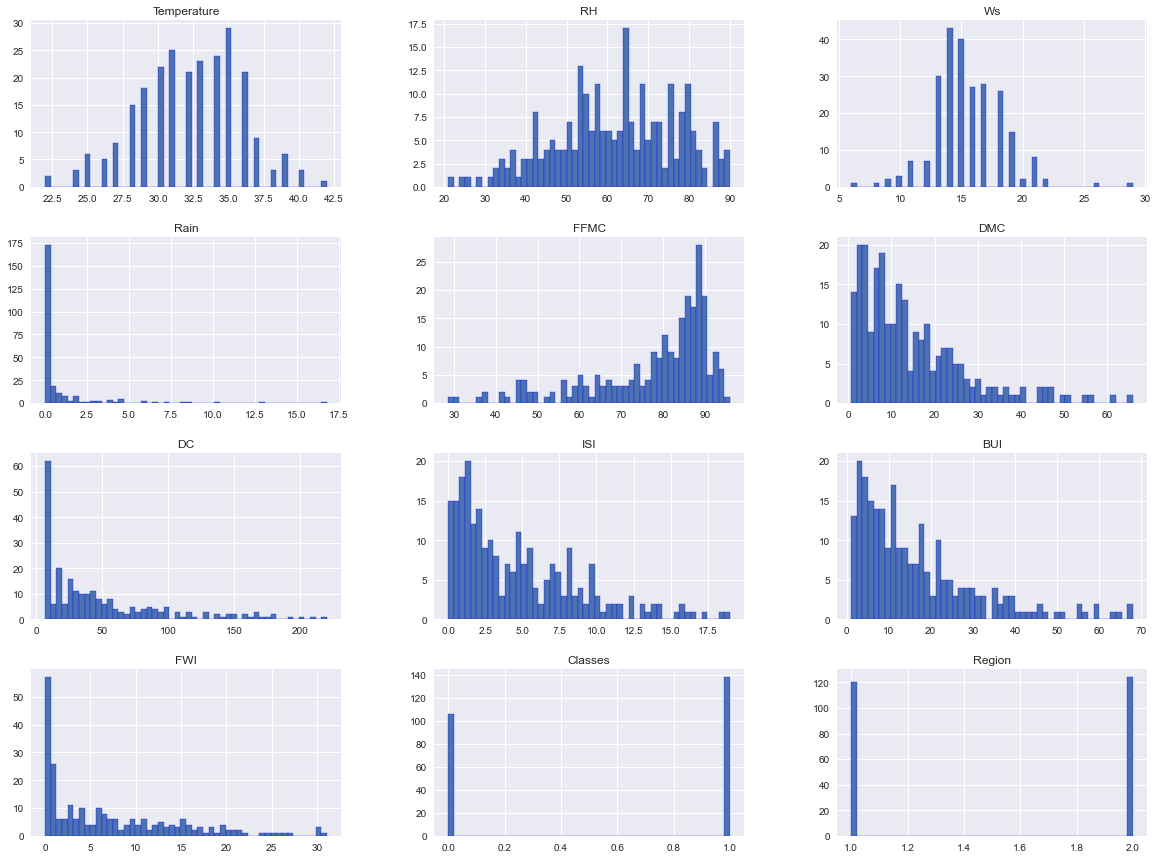

In [176]:
plt.style.use('seaborn')
df1.hist(bins=50,figsize=(20,15), ec= 'b')
plt.show()

In [177]:
# Percentage for PieChart

In [178]:
percentage = df.Classes.value_counts(normalize=True)*100

In [179]:
percentage

fire        56.557377
not fire    43.442623
Name: Classes, dtype: float64

**Charts**

In [181]:
# plotting pieChart

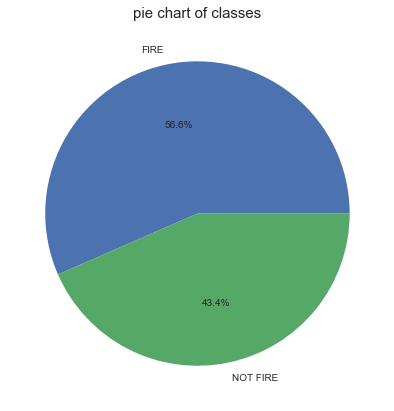

In [182]:
classeslabel = ["FIRE","NOT FIRE"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classeslabel,autopct='%1.1f%%')
plt.title("pie chart of classes", fontsize = 15)
plt.show()

**Checking Multicollinearity**

#### Canadian Forest Fire Weather Index (FWI) System
This column can be considered for Regression problem

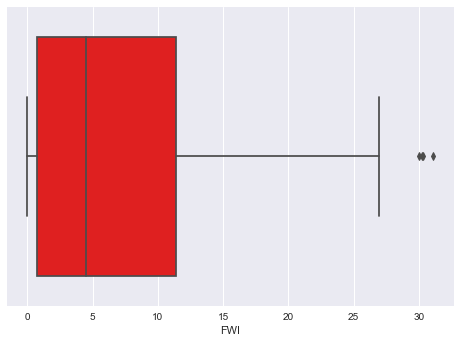

In [185]:
#Boxplot
ax = sns.boxplot(df['FWI'], color= 'red')

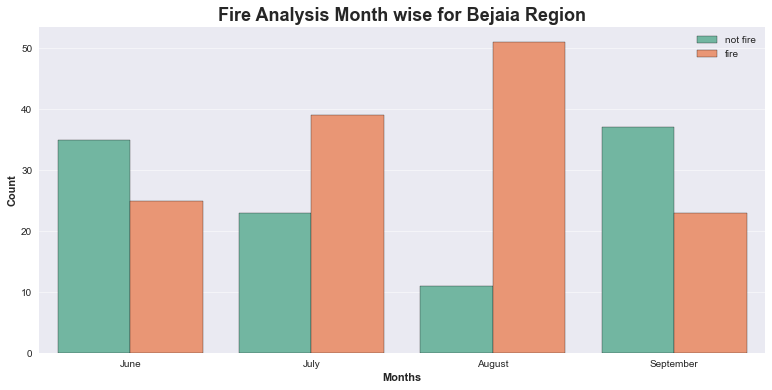

In [186]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

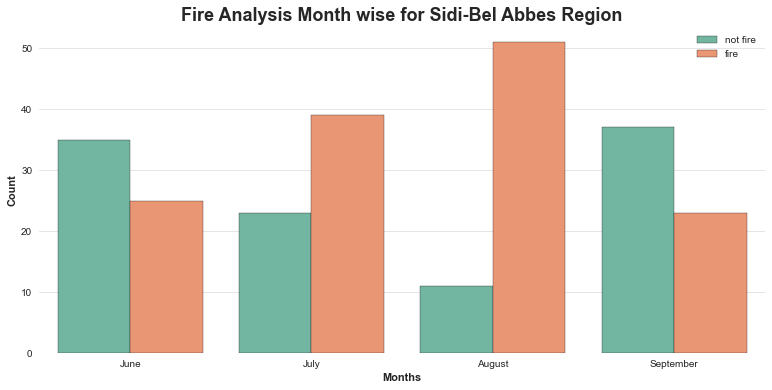

In [188]:
dftemp= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

* Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

* Most of the fires happened in August and very high Fires happened in only 3 months - **June, July and August.**

* Less Fires was on September

### Exploratory Data Analysis (EDA) on all Features

In [189]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [199]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

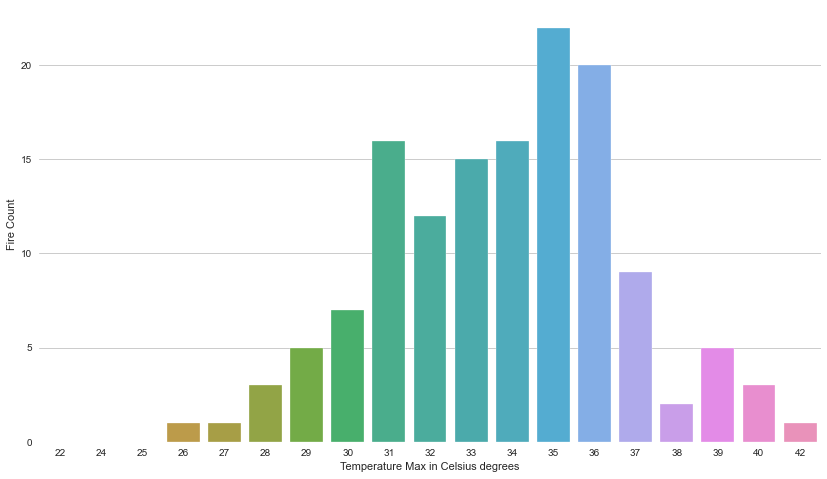

In [200]:
barchart('Temperature','Temperature Max in Celsius degrees')

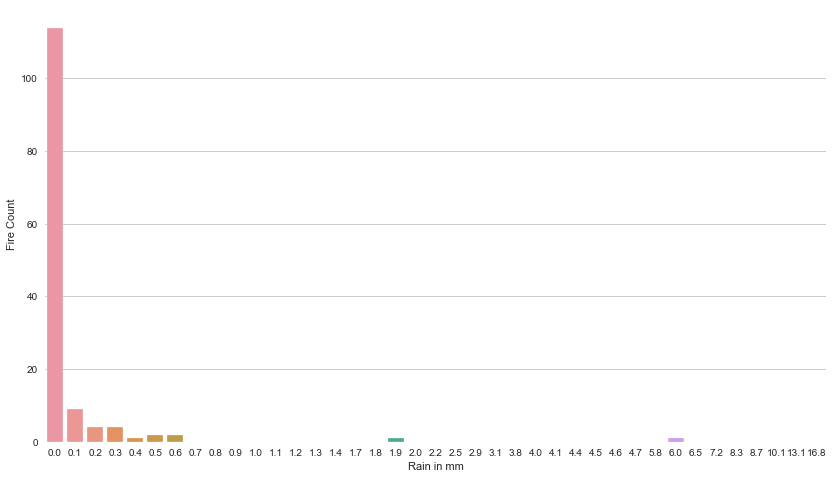

In [201]:
barchart('Rain', 'Rain in mm')

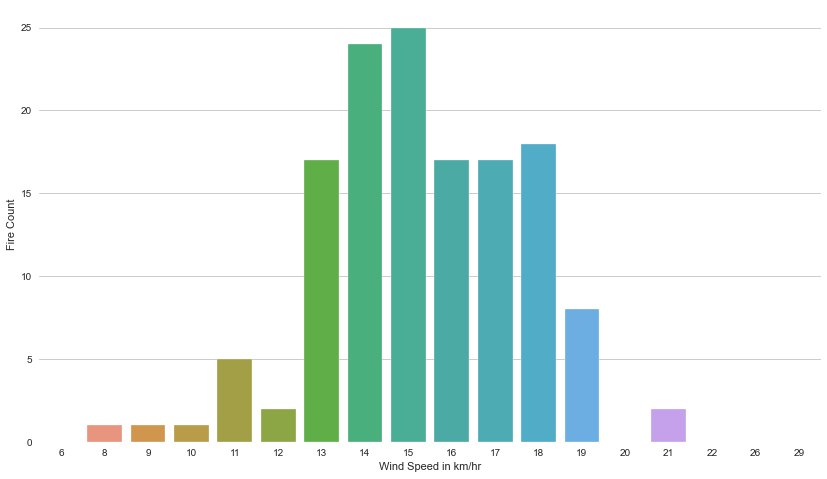

In [202]:
barchart('Ws', 'Wind Speed in km/hr')

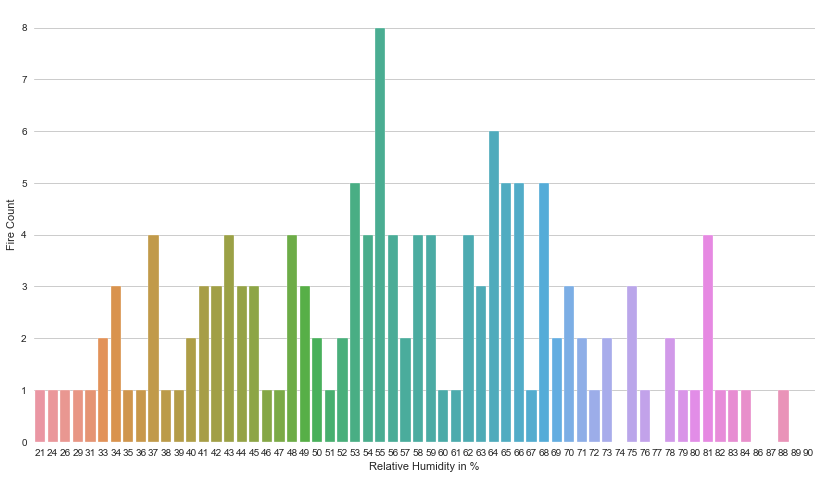

In [204]:
barchart('RH','Relative Humidity in %')

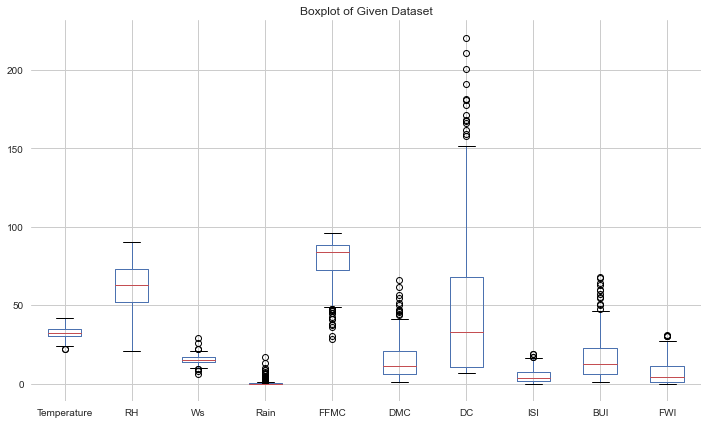

In [206]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize=(12,7))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

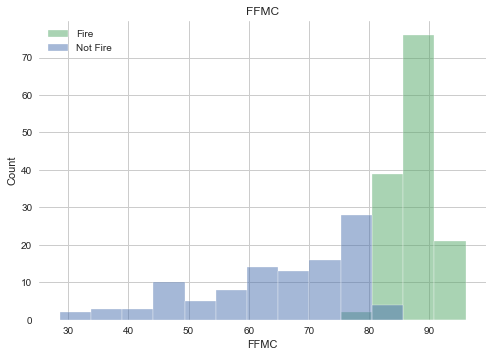

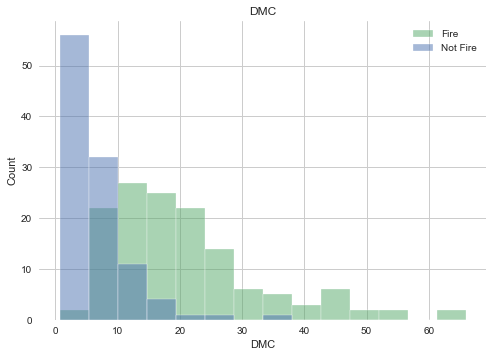

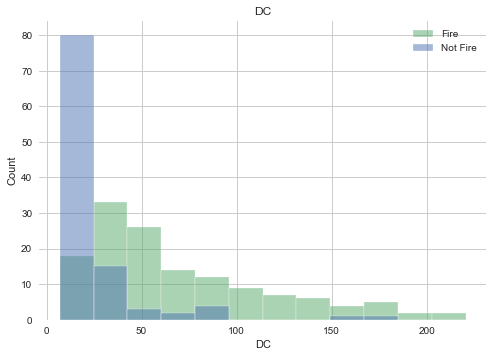

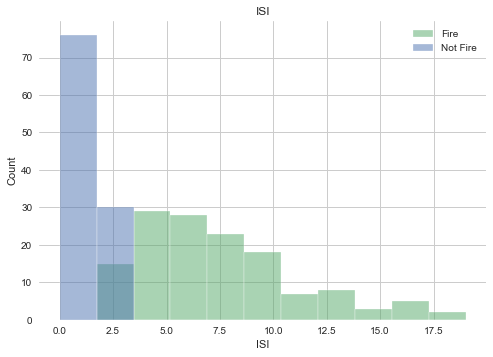

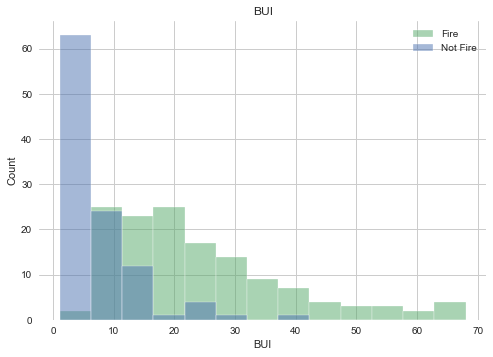

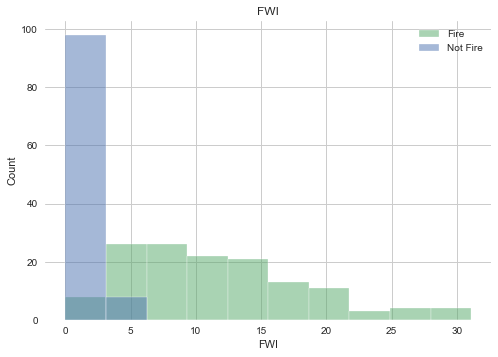

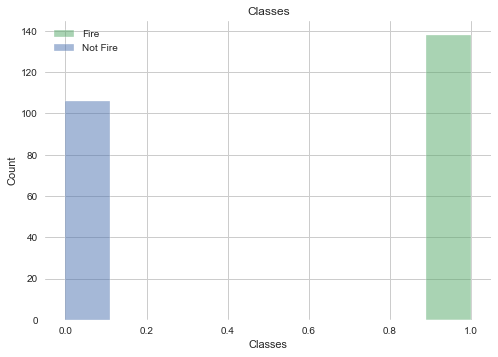

In [207]:
dftemp = dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

### REPORT 
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report 
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*, 
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*, 
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*, 
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*, 
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*, 
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [209]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

In [210]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [211]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [212]:
# Encoding Not fire as 0 and Fire as 1
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [213]:
X = df.drop('FWI',axis=1)
y= df['FWI']

In [214]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((183, 11), (61, 11))

In [215]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.626397,-0.223805,-0.337218,0.674470,0.441474,0.326426,0.598864,0.413295,0.517182,0.207196
RH,-0.626397,1.000000,0.193046,0.242255,-0.648065,-0.369303,-0.153657,-0.686348,-0.299767,-0.427113,-0.413176
Ws,-0.223805,0.193046,1.000000,0.154463,-0.140206,0.053853,0.115242,0.065385,0.078398,-0.043255,-0.128550
Rain,-0.337218,0.242255,0.154463,1.000000,-0.538923,-0.291663,-0.293540,-0.337706,-0.299251,-0.364521,-0.040920
FFMC,0.674470,-0.648065,-0.140206,-0.538923,1.000000,0.615337,0.501318,0.737919,0.594535,0.776578,0.186661
DMC,0.441474,-0.369303,0.053853,-0.291663,0.615337,1.000000,0.871791,0.667145,0.982879,0.612436,0.142159
DC,0.326426,-0.153657,0.115242,-0.293540,0.501318,0.871791,1.000000,0.466274,0.945211,0.513162,-0.144830
ISI,0.598864,-0.686348,0.065385,-0.337706,0.737919,0.667145,0.466274,1.000000,0.612288,0.736491,0.276240
BUI,0.413295,-0.299767,0.078398,-0.299251,0.594535,0.982879,0.945211,0.612288,1.000000,0.596903,0.034891
Classes,0.517182,-0.427113,-0.043255,-0.364521,0.776578,0.612436,0.513162,0.736491,0.596903,1.000000,0.190953


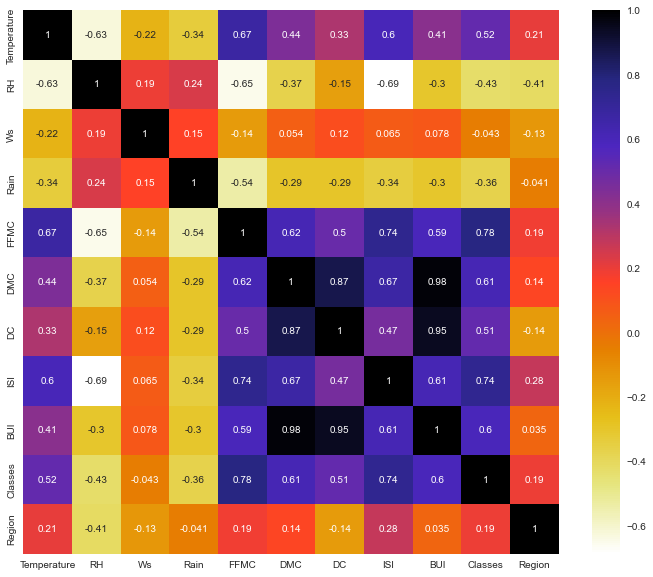

In [217]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [218]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [225]:
corr_features = correlation(X_train, 0.75)

In [224]:
corr_features

{'BUI', 'DC'}

In [226]:
# drop features which has correlation more than 0.75
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((183, 8), (61, 8))

In [227]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [228]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Text(0.5, 1.0, 'X_train After Scaling')

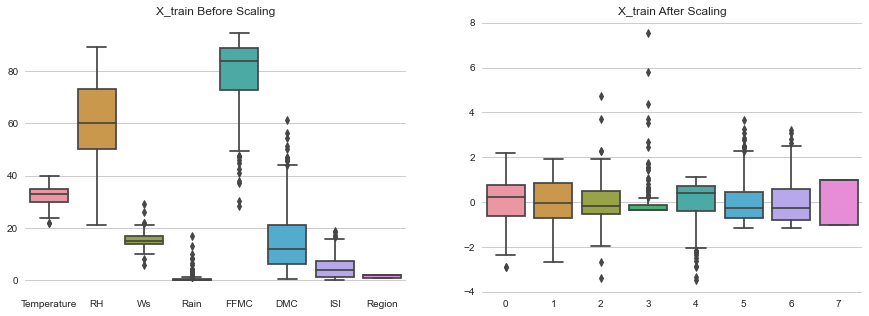

In [229]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

**0=Temperature, 1 = RH, 2 = Ws, 3 = Rain, 4 = FFMC,5 = DMC, 6 = ISI,7 = Region**

# 5. Model Selection For Regression 
* Now start the model selection process where we try out bunch of different models. 
* Choose some and fine tune and Finalize one model

## 5.1 Linear Regression

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))


Linear Regression
R2 Score value: 0.9778
MAE value: 0.6273


## 5.2 Lasso Regression

In [236]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)


print("Lasso Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Lasso Regression
R2 Score value: 0.9480
MAE value: 1.1206


## 5.3 Ridge Regression

In [238]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)


print("Ridge Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Ridge Regression
R2 Score value: 0.9774
MAE value: 0.6334


## 5.4 Support Vector Regressor

In [239]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)


print("Support Vector Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Support Vector Regressor
R2 Score value: 0.8423
MAE value: 1.1581


## 5.5 Random Forest Regressor

In [240]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.9781
MAE value: 0.6582


## 5.6 K-Neighbors Regressor

In [241]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
mae = mean_absolute_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)


print("K_Neighbours Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

K_Neighbours Regressor
R2 Score value: 0.9522
MAE value: 1.0016


### **Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| Random Forest Regressor     | 97.91 % |
| Linear Regression  | 97.00 % |
| Ridge Regression  | 96.90 % |
| K Neighbors Regressor  | 94.22 %|
| Lasso Regression  | 93.77 % |
| Support Vector Regressor     | 93.40 % |

## 4.7 Hyperparameter Tuning

### Tuning Random Forest Regressor

In [244]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [245]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9629
MAE value: 0.7704


### **Tuning Ridge Regression**

In [246]:
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings 
warnings.filterwarnings(action= 'ignore')
ridge_params = [{'alpha': (np.logspace(-11, 11, 100)), 
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}] 

ridge = Ridge()
random_ridge = RandomizedSearchCV(ridge, ridge_params, cv=10, n_jobs= -1)
random_ridge.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions=[{'alpha': array([1.00000000e-11, 1.66810054e-11, 2.78255940e-11, 4.64158883e-11,
       7.74263683e-11, 1.29154967e-10, 2.15443469e-10, 3.59381366e-10,
       5.99484250e-10, 1.00000000e-09, 1.66810054e-09, 2.78255940e-09,
       4.64158883e-09, 7.74263683e-09, 1.29154967e-08, 2.15443469e-08,
       3.59381366e-08, 5.994...
       5.99484250e+06, 1.00000000e+07, 1.66810054e+07, 2.78255940e+07,
       4.64158883e+07, 7.74263683e+07, 1.29154967e+08, 2.15443469e+08,
       3.59381366e+08, 5.99484250e+08, 1.00000000e+09, 1.66810054e+09,
       2.78255940e+09, 4.64158883e+09, 7.74263683e+09, 1.29154967e+10,
       2.15443469e+10, 3.59381366e+10, 5.99484250e+10, 1.00000000e+11]),
                                         'solver': ['auto', 'svd', 'cholesky',
                                                    'lsqr', 'sparse_cg', 'sag',
                                                    'saga', 'l

In [247]:
best_ridge = random_ridge.best_estimator_

rbest_pred = best_ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rbest_pred)
r2 = r2_score(y_test, rbest_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9760
MAE value: 0.6587


In [248]:
#### Feature removal

For the web app, I will use the 5 most important features that are helpful in predicting the fire since we it would be pain to front end user to fill all 8 features on the web app. I will drop the rest of features so we can build an interactive and user friendly web app.

In [249]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
6,ISI,0.346529
5,DMC,0.243935
4,FFMC,0.232970
3,Rain,0.071022
1,RH,0.042705
0,Temperature,0.040583
2,Ws,0.017872
7,Region,0.004385


Text(0, 0.5, 'Features')

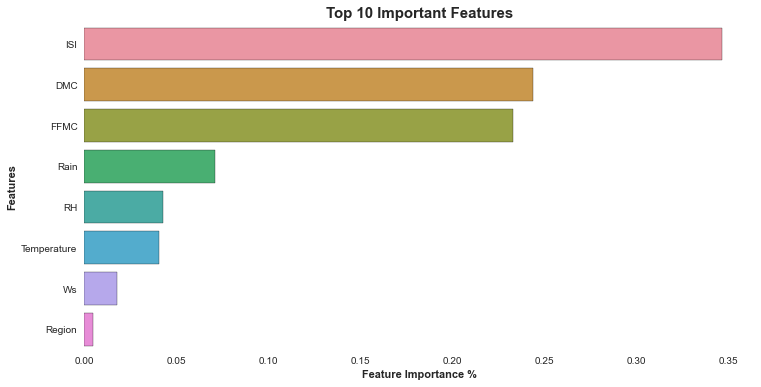

In [250]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 10 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

### Model for deployment

In [251]:
Xtrain_new = X_train.drop(['Rain', 'Region', 'RH'], axis=1)
Xtest_new = X_test.drop(['Rain', 'Region', 'RH'], axis=1)

In [252]:
Xtrain_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [253]:
Xtrain_new_scaled, Xtest_new_scaled = scaler_standard(Xtrain_new, Xtest_new)

In [254]:
best_random_grid.fit(Xtrain_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(Xtest_new_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9804
MAE value: 0.5973


In [255]:
import bz2,pickle
file = bz2.BZ2File('regression.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()

# 6. Model Selection For Classification
* Now start the model selection process where we try out bunch of different models. 
* Choose some and fine tune and Finalize one model

In [287]:
## 6.1 Import Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [288]:
X = df.drop('Classes',axis=1)
y= df['Classes']

In [289]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=36)
X_train.shape, X_test.shape

((170, 11), (74, 11))

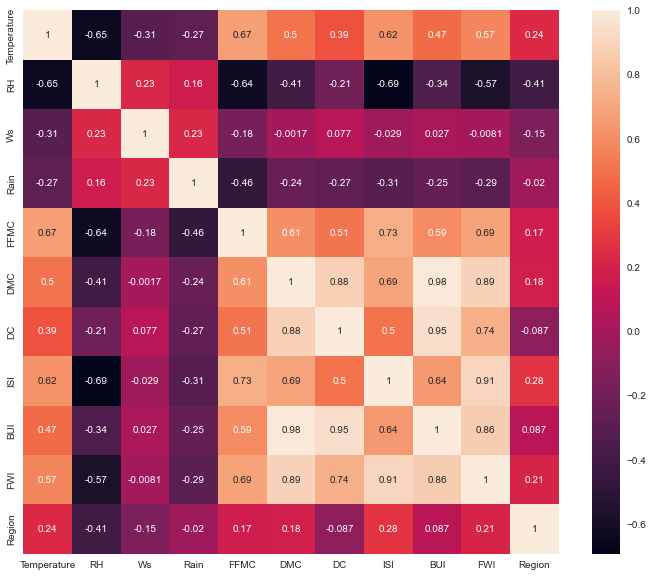

In [290]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [291]:
corr_features = correlation(X_train, 0.75)

In [292]:
corr_features

{'BUI', 'DC', 'FWI'}

In [293]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 8), (74, 8))

In [294]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [295]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train_scaled,y_train)
loreg_pred = loreg.predict(X_test_scaled)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.9459
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.96      0.96      0.96        45

    accuracy                           0.95        74
   macro avg       0.94      0.94      0.94        74
weighted avg       0.95      0.95      0.95        74



| Metrics     | Definition  |
| ----------- | ----------- |
| Precision      | Precision is defined as the ratio of true positives to the sum of true and false positives.       |
| Recall   | Recall is defined as the ratio of true positives to the sum of true positives and false negatives.        |
| F1 Score  | The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.   |

In [298]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(loreg, X_test_scaled, y_test)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

In [297]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 6.4 Decision Tree

In [299]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        45

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [300]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test_scaled, y_test)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

In [301]:
## 6.5 Random Forest

In [302]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_pred = rfc.predict(X_test_scaled)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9730
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.96      0.98        45

    accuracy                           0.97        74
   macro avg       0.97      0.98      0.97        74
weighted avg       0.97      0.97      0.97        74



In [303]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test_scaled, y_test)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

In [304]:
# KNeighborsClassifier to Train from SKlearn
knnc = RandomForestClassifier()
knnc.fit(X_train_scaled,y_train)
knn_pred = knnc.predict(X_test_scaled)
score = accuracy_score(y_test,knn_pred)
cr = classification_report(y_test,knn_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

KNeighbors Classifier
Accuracy Score value: 0.9730
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.96      0.98        45

    accuracy                           0.97        74
   macro avg       0.97      0.98      0.97        74
weighted avg       0.97      0.97      0.97        74



In [305]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knnc, X_test_scaled, y_test)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

In [306]:
## 6.7 XGboost Model 

In [307]:
# Import KNeighborsClassifier to Train from SKlearn
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
xgb_pred = xgb.predict(X_test_scaled)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

[13:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost Classifier
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        45

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



**Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| XGboost classifier     | 97.26 % |
| Decision Tree Classifier  | 97.26 % |
| Logistic Regression Accurracy  | 95.89 % |
| KNeighbors Classifier  | 95.89 %|
| Random Forest Classifier  | 95.89 % |

### **XGboost classifier Tuning**

In [308]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(X_train_scaled, y_train).best_estimator_

[13:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.5050505050505051, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [309]:
best_xgb = Random_xgb.best_estimator_
best_xgb.score(X_test_scaled,y_test)
bestxgb_pred = best_xgb.predict(X_test_scaled)
cr = classification_report(y_test,bestxgb_pred)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL XGB
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        45

    accuracy                           0.99        74
   macro avg       0.98      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



### **Random Forest classifier Tuning**

In [310]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
random_rf = RandomizedSearchCV(rfc, params, cv = 10,n_jobs = -1)
random_rf.fit(X_train_scaled, y_train).best_estimator_

RandomForestClassifier(max_depth=14, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=130)

In [311]:
best_rf = random_rf.best_estimator_
best_rf.score(X_test_scaled,y_test)
bestrf_pred = best_rf.predict(X_test_scaled)
cr = classification_report(y_test,bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL Random Forest
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.96      0.98        45

    accuracy                           0.97        74
   macro avg       0.97      0.98      0.97        74
weighted avg       0.97      0.97      0.97        74

